<a href="https://colab.research.google.com/github/mralamdari/CV-Yolo/blob/main/YOLO_v3_ObjectDetection_TensorFlow_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

!wget -P model_data https://pjreddie.com/media/files/yolov3.weights

--2022-08-18 04:34:16--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘model_data/yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  72.2MB/s    in 3.5s    

2022-08-18 04:34:19 (67.7 MB/s) - ‘model_data/yolov3.weights’ saved [248007048/248007048]



In [2]:
with open('model_data/yolov3.weights', 'rb') as wf:
    major, minor, revision, seen, _ = np.fromfile(wf, dtype=np.int32, count=5)

    weights_1 = np.fromfile(wf, dtype=np.float32, count=2)
    weights_2 = np.fromfile(wf, dtype=np.float32, count=20)
    weights_3 = np.fromfile(wf, dtype=np.float32)




In [3]:
major, minor, revision, seen, _ 

(0, 2, 0, 32013312, 0)

In [4]:
weights_1

array([-4.316885 , -0.7578076], dtype=float32)

In [5]:
weights_2

array([-2.1098018 ,  1.7402638 ,  1.4071269 , -3.0952053 , -0.38860837,
        0.75603795,  1.982805  ,  1.2893223 ,  0.652888  ,  2.6263633 ,
        2.3013082 , -2.04827   , -3.7340226 , -2.0467598 ,  3.845535  ,
       -1.0419698 , -0.30135924, -0.35420752, -3.5354283 , -2.628548  ],
      dtype=float32)

In [6]:
weights_3

array([ 0.74821305,  0.3917957 ,  2.3627155 , ..., -0.03373355,
       -0.04969028, -0.11880384], dtype=float32)

In [7]:
weights_3.shape

(62001735,)

In [8]:
import tensorflow as tf

# tf.config.experimental.list_physical_devices('GPU')
tf.config.list_physical_devices('GPU')

[]

In [9]:
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    try: 
      tf.config.set_memory_growth(physical_devices[0], True)
    except RuntimeError:
      pass

In [10]:
X = tf.random.normal([512, 32]);
Y = tf.split(X,128,0)
Y_shape = tf.shape(Y[0])
Y_shape2 = tf.shape(Y[1])


print(len(X))
print(len(Y))
print(Y_shape)
print(Y_shape2)


512
128
tf.Tensor([ 4 32], shape=(2,), dtype=int32)
tf.Tensor([ 4 32], shape=(2,), dtype=int32)


In [11]:
X.shape

TensorShape([512, 32])

In [12]:
a=tf.random_normal_initializer(stddev=0.01)

In [13]:
s=tf.constant_initializer(0.)

In [14]:
a

In [15]:
output_size = 13
y = tf.range(output_size, dtype=tf.int32)
y = tf.expand_dims(y, -1)
y = tf.tile(y, [1, output_size])
x = tf.range(output_size,dtype=tf.int32)
x = tf.expand_dims(x, 0)
x = tf.tile(x, [output_size, 1])

xy_grid = tf.meshgrid(tf.range(output_size), tf.range(output_size))
xy_grid = tf.expand_dims(tf.stack(xy_grid, axis=-1), axis=2)  # [gx, gy, 1, 2]
xy_grid = tf.tile(tf.expand_dims(xy_grid, axis=0), [32, 1, 1, 3, 1])
xy_grid = tf.cast(xy_grid, tf.float32)

In [16]:
y = tf.range(output_size, dtype=tf.int32)
y

<tf.Tensor: shape=(13,), dtype=int32, numpy=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)>

In [17]:
y = tf.expand_dims(y, -1)
y

<tf.Tensor: shape=(13, 1), dtype=int32, numpy=
array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12]], dtype=int32)>

In [18]:
y = tf.tile(y, [1, output_size])
y

<tf.Tensor: shape=(13, 13), dtype=int32, numpy=
array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
       [ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
       [ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4],
       [ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5],
       [ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6],
       [ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7],
       [ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8],
       [ 9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
       [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]], dtype=int32)>

In [19]:
x = tf.range(output_size,dtype=tf.int32)
x = tf.expand_dims(x, 0)
x

<tf.Tensor: shape=(1, 13), dtype=int32, numpy=array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]], dtype=int32)>

In [20]:
x = tf.tile(x, [output_size, 1])
x

<tf.Tensor: shape=(13, 13), dtype=int32, numpy=
array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]], dtype=int32)>

In [21]:
x = [1, 2, 3,99, 95, 200]
y = [4, 5, 6]
X, Y = tf.meshgrid(x, y)
X, Y

(<tf.Tensor: shape=(3, 6), dtype=int32, numpy=
 array([[  1,   2,   3,  99,  95, 200],
        [  1,   2,   3,  99,  95, 200],
        [  1,   2,   3,  99,  95, 200]], dtype=int32)>,
 <tf.Tensor: shape=(3, 6), dtype=int32, numpy=
 array([[4, 4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5, 5],
        [6, 6, 6, 6, 6, 6]], dtype=int32)>)

In [22]:
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]
tf.meshgrid(x, y)

[<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
 array([[1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4]], dtype=int32)>,
 <tf.Tensor: shape=(4, 4), dtype=int32, numpy=
 array([[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3],
        [4, 4, 4, 4]], dtype=int32)>]

In [23]:
xy_grid = tf.meshgrid(tf.range(output_size), tf.range(output_size))
xy_grid

[<tf.Tensor: shape=(13, 13), dtype=int32, numpy=
 array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]], dtype=int32)>,
 <tf.Tensor: shape=(13, 13), dtype=int32, numpy=
 array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 1,  1,  

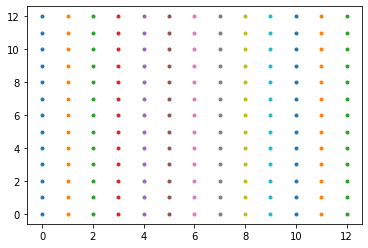

In [24]:
import matplotlib.pyplot as plt
plt.plot(xy_grid[0], xy_grid[1], marker='.', linestyle='none')

In [25]:
tf.reshape(xy_grid, (13, 13, 2))

<tf.Tensor: shape=(13, 13, 2), dtype=int32, numpy=
array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12,  0],
        [ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8],
        [ 9, 10],
        [11, 12]],

       [[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12,  0],
        [ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8],
        [ 9, 10],
        [11, 12]],

       [[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12,  0],
        [ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8],
        [ 9, 10],
        [11, 12]],

       [[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12,  0],
        [ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8],
        [ 9, 10],
        [11, 12]],

     

In [26]:
tf.stack(xy_grid, axis=-1)

<tf.Tensor: shape=(13, 13, 2), dtype=int32, numpy=
array([[[ 0,  0],
        [ 1,  0],
        [ 2,  0],
        [ 3,  0],
        [ 4,  0],
        [ 5,  0],
        [ 6,  0],
        [ 7,  0],
        [ 8,  0],
        [ 9,  0],
        [10,  0],
        [11,  0],
        [12,  0]],

       [[ 0,  1],
        [ 1,  1],
        [ 2,  1],
        [ 3,  1],
        [ 4,  1],
        [ 5,  1],
        [ 6,  1],
        [ 7,  1],
        [ 8,  1],
        [ 9,  1],
        [10,  1],
        [11,  1],
        [12,  1]],

       [[ 0,  2],
        [ 1,  2],
        [ 2,  2],
        [ 3,  2],
        [ 4,  2],
        [ 5,  2],
        [ 6,  2],
        [ 7,  2],
        [ 8,  2],
        [ 9,  2],
        [10,  2],
        [11,  2],
        [12,  2]],

       [[ 0,  3],
        [ 1,  3],
        [ 2,  3],
        [ 3,  3],
        [ 4,  3],
        [ 5,  3],
        [ 6,  3],
        [ 7,  3],
        [ 8,  3],
        [ 9,  3],
        [10,  3],
        [11,  3],
        [12,  3]],

     

In [27]:
x = tf.constant([1, 4])
y = tf.constant([2, 5])
z = tf.constant([3, 6])
tf.stack([x, y, z], axis=1)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [28]:
tf.stack(xy_grid, axis=-1).shape

TensorShape([13, 13, 2])

In [29]:
xy_grid = tf.expand_dims(tf.stack(xy_grid, axis=-1), axis=2)  # [gx, gy, 1, 2]
xy_grid

<tf.Tensor: shape=(13, 13, 1, 2), dtype=int32, numpy=
array([[[[ 0,  0]],

        [[ 1,  0]],

        [[ 2,  0]],

        [[ 3,  0]],

        [[ 4,  0]],

        [[ 5,  0]],

        [[ 6,  0]],

        [[ 7,  0]],

        [[ 8,  0]],

        [[ 9,  0]],

        [[10,  0]],

        [[11,  0]],

        [[12,  0]]],


       [[[ 0,  1]],

        [[ 1,  1]],

        [[ 2,  1]],

        [[ 3,  1]],

        [[ 4,  1]],

        [[ 5,  1]],

        [[ 6,  1]],

        [[ 7,  1]],

        [[ 8,  1]],

        [[ 9,  1]],

        [[10,  1]],

        [[11,  1]],

        [[12,  1]]],


       [[[ 0,  2]],

        [[ 1,  2]],

        [[ 2,  2]],

        [[ 3,  2]],

        [[ 4,  2]],

        [[ 5,  2]],

        [[ 6,  2]],

        [[ 7,  2]],

        [[ 8,  2]],

        [[ 9,  2]],

        [[10,  2]],

        [[11,  2]],

        [[12,  2]]],


       [[[ 0,  3]],

        [[ 1,  3]],

        [[ 2,  3]],

        [[ 3,  3]],

        [[ 4,  3]],

        [[ 5,  3

In [30]:
tf.stack(xy_grid, axis=-1)

<tf.Tensor: shape=(13, 1, 2, 13), dtype=int32, numpy=
array([[[[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
         [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]]],


       [[[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
         [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]]],


       [[[ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
         [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]]],


       [[[ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
         [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]]],


       [[[ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4],
         [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]]],


       [[[ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5],
         [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]]],


       [[[ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6],
         [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]]],


       [[[ 7,  7,  7,  7,  7,  7,  7

In [31]:
tf.expand_dims(xy_grid, axis=0).shape

TensorShape([1, 13, 13, 1, 2])

In [32]:
# tf.shape(tf.reshape(tf.expand_dims(xy_grid, axis=0), [32, 13, 13, 3, 2]))

In [33]:
xy_grid = tf.tile(tf.expand_dims(xy_grid, axis=0), [32, 1, 1, 3, 1])
xy_grid.shape

TensorShape([32, 13, 13, 3, 2])

In [34]:
tf.tile([[1, 2, 3, 4], [20, 30, 40, 50]], [1, 2])

<tf.Tensor: shape=(2, 8), dtype=int32, numpy=
array([[ 1,  2,  3,  4,  1,  2,  3,  4],
       [20, 30, 40, 50, 20, 30, 40, 50]], dtype=int32)>

In [35]:
xy_grid = tf.cast(xy_grid, tf.float32)
xy_grid

<tf.Tensor: shape=(32, 13, 13, 3, 2), dtype=float32, numpy=
array([[[[[ 0.,  0.],
          [ 0.,  0.],
          [ 0.,  0.]],

         [[ 1.,  0.],
          [ 1.,  0.],
          [ 1.,  0.]],

         [[ 2.,  0.],
          [ 2.,  0.],
          [ 2.,  0.]],

         ...,

         [[10.,  0.],
          [10.,  0.],
          [10.,  0.]],

         [[11.,  0.],
          [11.,  0.],
          [11.,  0.]],

         [[12.,  0.],
          [12.,  0.],
          [12.,  0.]]],


        [[[ 0.,  1.],
          [ 0.,  1.],
          [ 0.,  1.]],

         [[ 1.,  1.],
          [ 1.,  1.],
          [ 1.,  1.]],

         [[ 2.,  1.],
          [ 2.,  1.],
          [ 2.,  1.]],

         ...,

         [[10.,  1.],
          [10.,  1.],
          [10.,  1.]],

         [[11.,  1.],
          [11.,  1.],
          [11.,  1.]],

         [[12.,  1.],
          [12.,  1.],
          [12.,  1.]]],


        [[[ 0.,  2.],
          [ 0.,  2.],
          [ 0.,  2.]],

         [[ 1.,  2.],


In [36]:
# xy_grid = tf.concat([x[:, :, tf.newaxis], y[:, :, tf.newaxis]], axis=-1)
# xy_grid

In [38]:
import cv2
def image_preprocess(image, target_size, gt_boxes=None):
    target_height, target_width  = target_size
    h,  w, _  = image.shape
    print('target_size', target_height, target_width)
    print('image.shape', h, w)

    scale = min(target_width / w, target_height / h)
    print('scale', scale)
    scaled_width, scaled_height  = int(scale * w), int(scale * h)
    print('N.shape', scaled_height, scaled_width)

    image_resized = cv2.resize(image, (scaled_width, scaled_height))
    print(f'image_resized: {image_resized.shape}')
    print(image_resized.shape)
    
    image_paded = np.full(shape=[target_height, target_width, 3], fill_value=127.5)# fill_value = 255/2 == 127.5
    print(f'image_paded: {image_paded.shape}')
    print(image_paded.shape)

    offset_width, offset_height = (target_width - scaled_width) // 2, (target_height - scaled_height) // 2

    image_paded[offset_height : scaled_height+offset_height, offset_width : scaled_width+offset_width, :] = image_resized
    
    image_paded = image_paded / 255.

    if gt_boxes is None:
        return image_paded

    else:
        gt_boxes[:, [0, 2]] = gt_boxes[:, [0, 2]] * scale + offset_width
        gt_boxes[:, [1, 3]] = gt_boxes[:, [1, 3]] * scale + offset_height
        return image_paded, gt_boxes


# image_data = image_preprocess(np.copy(original_image), [416, 416])        

In [39]:
original_image      = cv2.imread('/content/drive/MyDrive/office.jpg')
original_image      = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
original_image      = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

image_data = image_preprocess(np.copy(original_image), [416, 416])

target_size 416 416
image.shape 2556 4410
scale 0.09433106575963719
N.shape 241 416
image_resized: (241, 416, 3)
(241, 416, 3)
image_paded: (416, 416, 3)
(416, 416, 3)


In [49]:
image_data.shape
# , image_data[np.newaxis:...].shape

(416, 416, 3)

In [47]:
np.full((416, 416, 3), fill_value=123).reshape((1, 416, 416, 3)).shape

(1, 416, 416, 3)